# This notebook is designed to obtain quick analytical responses for N single photon consecutive Mach-Zehnder interferometers with equal semitransparent objects in one of their arms, details on the theory can be found in [pongo mi tesis cuando este lista], as the reference shows this quantum optics problem is reduced to matrix multiplication

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

# Let us now define the symbols we will use for this calculation, we will first illustrate how the notebook works with N=4, we will expose the final code where N is an input

In [2]:
init_printing(use_unicode=True)
theta1, theta2, theta3,theta4,gamma1,gamma2,gamma3,gamma4= symbols('theta1 theta2 theta3 thetha4 gamma1 gamma2 gamma3 gamma4 ',real=True)
beta=Symbol('beta')

# Let us begin by defining 4 BS matrices with Different $\theta$, on why we use this matrix can be found in my thesis [luego la a;ado es la uno], we will also define general mirrors to model dephasing,

In [3]:
BS1=Matrix([[cos(theta1),I*sin(theta1)],[I*sin(theta1),cos(theta1)]])
BS2=Matrix([[cos(theta2),I*sin(theta2)],[I*sin(theta2),cos(theta2)]])
BS3=Matrix([[cos(theta3),I*sin(theta3)],[I*sin(theta3),cos(theta3)]])
BS4=Matrix([[cos(theta4),I*sin(theta4)],[I*sin(theta4),cos(theta4)]])
BS1

⎡ cos(θ₁)   ⅈ⋅sin(θ₁)⎤
⎢                    ⎥
⎣ⅈ⋅sin(θ₁)   cos(θ₁) ⎦

In [4]:
M1=Matrix([[exp(I*gamma2),0],[0,exp(I*gamma1)]])
M1

⎡ ⅈ⋅γ₂       ⎤
⎢ℯ        0  ⎥
⎢            ⎥
⎢        ⅈ⋅γ₁⎥
⎣  0    ℯ    ⎦

# We will use a non-unitary matrix to represent our imperfect absorber just like in the paper by H. Azuma [2](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.74.054301)

In [5]:
A=Matrix([[ 1,0],[0,beta]])
A

⎡1  0⎤
⎢    ⎥
⎣0  β⎦

# Here we define our vector basis we will use the computational basis as explained in the reference [1]

In [6]:
jones1= Matrix([0,1])
jones0= Matrix([1,0])
jones1

⎡0⎤
⎢ ⎥
⎣1⎦

# We can get our final state (minus the aborption part that will be found substracting from unity) by simply permorming the matrix multiplication 

In [7]:
r=BS2*M1*A*BS1*jones0
r

⎡      ⅈ⋅γ₁                    ⅈ⋅γ₂                 ⎤
⎢ - β⋅ℯ    ⋅sin(θ₁)⋅sin(θ₂) + ℯ    ⋅cos(θ₁)⋅cos(θ₂) ⎥
⎢                                                   ⎥
⎢     ⅈ⋅γ₁                      ⅈ⋅γ₂                ⎥
⎣ⅈ⋅β⋅ℯ    ⋅sin(θ₁)⋅cos(θ₂) + ⅈ⋅ℯ    ⋅sin(θ₂)⋅cos(θ₁)⎦

# Then we can find the probabilities because as described in [2], the probabilities are given by $P_{D_{i}}=|\left\langle{i}\right|BS_{2} Mirrors BS_{1} \left|{initial}\right\rangle|^{2}$, where initial can be either of the states in our basis in this notebook we will use the first state as initial this can be changed in the above equation replacing jones0 by jones1

In [8]:
p1=jones0.T*r
p1=p1[0]*conjugate(p1[0])
p1=simplify(re(p1))
p1

In [9]:
p2=jones1.T*r
p2=p2[0]*conjugate(p2[0])
p2=simplify(re(p2))
p2

In [10]:
pabs=1-p1-p2
pabs.simplify()

# By using $1-\cos^{2}(\theta)$,$(re(a)=re(a*))$ and $\cos(A-B)-\cos(A+B)=2\sin(A)\sin(B)$ we arrive at the exact same result derived by zurika [referencia](#), probing this approach works (I'm working to get the exact same simplification from the code), I will insert graphs fot the probabilities here later, We can now do the same for N Beam splitters(in the program K=1 means different $\theta$):

In [61]:
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=Symbol('theta1',real=True)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista
        


In [62]:
def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[exp(I*gamma2),0],[0,exp(I*gamma1)]])
    A=Matrix([[ 1,0],[0,beta]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=K[i]*r
            else:
                r=M1*A*K[i]*r
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
        


# Let us test this program for N=2

In [44]:
N_mach_zehnder(2,1)

⎡      ⅈ⋅γ₁                    ⅈ⋅γ₂                 ⎤
⎢ - β⋅ℯ    ⋅sin(θ₁)⋅sin(θ₂) + ℯ    ⋅cos(θ₁)⋅cos(θ₂) ⎥
⎢                                                   ⎥
⎢     ⅈ⋅γ₁                      ⅈ⋅γ₂                ⎥
⎣ⅈ⋅β⋅ℯ    ⋅sin(θ₁)⋅cos(θ₂) + ⅈ⋅ℯ    ⋅sin(θ₂)⋅cos(θ₁)⎦

# Now let us write our final function and test it:

In [45]:
def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

    

In [46]:
pabs,pd1,pd2,K=N_Interferomemer(2,1)

In [47]:
pd1=simplify(pd1)
pd1

In [48]:
from sympy.plotting import plot3d
import matplotlib.animation as animation
from ipywidgets import *

<IPython.core.display.Javascript object>


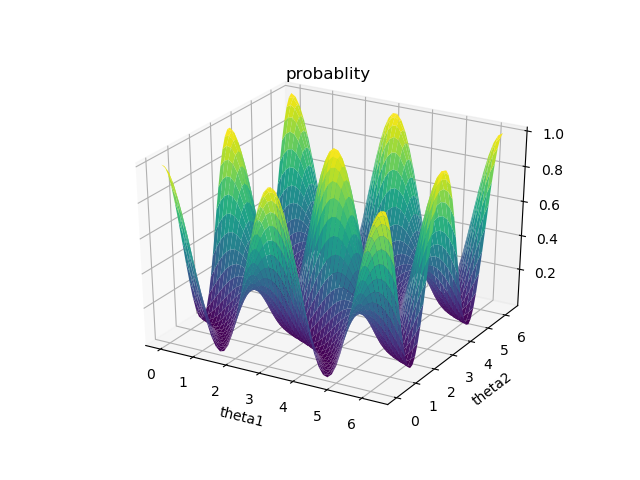

In [49]:
plot3d(pd1.subs({beta:0.5, gamma1: 0,gamma2:2*pi}),(K[1],0,2*pi),(K[2],0,2*pi),xlabel=theta1,ylabel=theta2,title='probablity')
plt.show()

# Turns out simpy simplify function is terribly slow even for this, I'll make the same algorithm in mathematica and hope it goes better, I'll also try to generate plots in the same way that the Zurika article and also try symengine to speed this up if possible